In [89]:
# Ignore  the warnings
import warnings
warnings.filterwarnings('always')
warnings.filterwarnings('ignore')

# data visualisation and manipulation
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import style
import seaborn as sns
 
#configure
# sets matplotlib to inline and displays graphs below the corressponding cell.
%matplotlib inline  
style.use('fivethirtyeight')
sns.set(style='whitegrid',color_codes=True)

#model selection
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
from sklearn.metrics import accuracy_score,precision_score,recall_score,confusion_matrix,roc_curve,roc_auc_score
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import LabelEncoder
#preprocess.
from keras.preprocessing.image import ImageDataGenerator

#dl libraraies
from keras import backend as K
from keras.models import Sequential
from keras.layers import Dense
from keras.optimizers import Adam,SGD,Adagrad,Adadelta,RMSprop
from keras.utils import to_categorical
# specifically for cnn
from keras.layers import Dropout, Flatten,Activation
from keras.layers import Conv2D, MaxPooling2D, BatchNormalization
from keras.layers import Dropout 
import tensorflow as tf
import random as rn

In [90]:
# specifically for manipulating zipped images and getting numpy arrays of pixel values of images.
import cv2                  
import numpy as np  
from tqdm import tqdm
import os                   
from random import shuffle  
from zipfile import ZipFile
from PIL import Image

In [91]:
def assign_label(img,flower_type):
    return flower_type

In [92]:
def make_train_data(flower_type,DIR):
    for img in os.listdir(DIR):
        label=assign_label(img,flower_type)
        path = os.path.join(DIR,img)
        img = cv2.imread(path,cv2.IMREAD_COLOR)
        img = cv2.resize(img, (IMG_SIZE,IMG_SIZE))
            
        X.append(np.array(img))
        Z.append(str(label))

In [93]:
X=[]
Z=[]
IMG_SIZE=80
FLOWER_DAISY_DIR='/Users/user/Desktop/flower/daisy'
FLOWER_SUNFLOWER_DIR='/Users/user/Desktop/flower/sunflower'
FLOWER_TULIP_DIR='/Users/user/Desktop/flower/tulip'
FLOWER_DANDI_DIR='/Users/user/Desktop/flower/dandelion'
FLOWER_ROSE_DIR='/Users/user/Desktop/flower/rose'

In [94]:
print(os.listdir('/Users/user/Desktop/flower'))

['daisy', 'dandelion', 'rose', 'sunflower', 'tulip']


In [95]:
make_train_data('Daisy',FLOWER_DAISY_DIR)
print(len(X))

769


In [96]:
make_train_data('Sunflower',FLOWER_SUNFLOWER_DIR)
print(len(X))

1503


In [97]:
make_train_data('Tulip',FLOWER_TULIP_DIR)
print(len(X))

2487


In [98]:
#make_train_data('Dandelion',FLOWER_DANDI_DIR)
#print(len(X))

In [99]:
make_train_data('Rose',FLOWER_ROSE_DIR)
print(len(X))

3271


In [100]:
le=LabelEncoder()
Y=le.fit_transform(Z)
s=set(Z)
l=[]
for i in s:
    l.append(i)
cheak1=le.fit_transform(l)
cheak2=to_categorical(cheak1,5)
Y=to_categorical(Y,5)
X=np.array(X)
X=X/255

In [101]:
print(cheak2)
print(cheak1)
print(l)

[[0. 0. 0. 1. 0.]
 [1. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0.]
 [0. 0. 1. 0. 0.]]
[3 0 1 2]
['Tulip', 'Daisy', 'Rose', 'Sunflower']


In [102]:
x_train,x_test,y_train,y_test=train_test_split(X,Y,test_size=0.25,random_state=42)

In [103]:
# # modelling starts using a CNN.
bn=BatchNormalization(momentum=0.0)
model = Sequential()
model.add(Conv2D(filters = 16, kernel_size = (5,5),padding = 'Same',activation ='relu', input_shape = (IMG_SIZE,IMG_SIZE,3)))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(BatchNormalization())

model.add(Conv2D(filters = 32, kernel_size = (4,4),padding = 'Same',activation ='relu'))
model.add(MaxPooling2D(pool_size=(2,2), strides=(2,2)))
model.add(BatchNormalization())

model.add(Conv2D(filters =64, kernel_size = (3,3),padding = 'Same',activation ='relu'))
model.add(MaxPooling2D(pool_size=(2,2), strides=(2,2)))
model.add(BatchNormalization())

model.add(Conv2D(filters = 96, kernel_size = (3,3),padding = 'Same',activation ='relu'))
model.add(MaxPooling2D(pool_size=(2,2), strides=(2,2)))
model.add(BatchNormalization())

model.add(Flatten())
model.add(Dense(512))
model.add(Activation('relu'))
model.add(Dense(256))
model.add(Activation('relu'))
model.add(Dense(5, activation = "softmax"))

In [108]:
batch_size=128
epochs=36

from keras.callbacks import ReduceLROnPlateau
red_lr= ReduceLROnPlateau(monitor='val_acc',patience=3,verbose=1,factor=0.1)

In [109]:
datagen=ImageDataGenerator()
datagen.fit(x_train)

In [110]:
model.compile(optimizer=Adam(lr=0.001),loss='categorical_crossentropy',metrics=['accuracy'])
model.summary()

Model: "sequential_8"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_29 (Conv2D)           (None, 80, 80, 16)        1216      
_________________________________________________________________
max_pooling2d_29 (MaxPooling (None, 40, 40, 16)        0         
_________________________________________________________________
batch_normalization_25 (Batc (None, 40, 40, 16)        64        
_________________________________________________________________
conv2d_30 (Conv2D)           (None, 40, 40, 32)        8224      
_________________________________________________________________
max_pooling2d_30 (MaxPooling (None, 20, 20, 32)        0         
_________________________________________________________________
batch_normalization_26 (Batc (None, 20, 20, 32)        128       
_________________________________________________________________
conv2d_31 (Conv2D)           (None, 20, 20, 64)       

In [111]:
History = model.fit_generator(datagen.flow(x_train,y_train, batch_size=batch_size),
                              epochs = epochs, validation_data = (x_test,y_test),
                              verbose = 1, steps_per_epoch=x_train.shape[0] // batch_size)


Epoch 1/36
19/19 [==============================] - ETA: 23s - loss: 0.4057 - accuracy: 0.859 - ETA: 15s - loss: 0.5791 - accuracy: 0.793 - ETA: 12s - loss: 0.5772 - accuracy: 0.796 - ETA: 11s - loss: 0.6375 - accuracy: 0.759 - ETA: 11s - loss: 0.6516 - accuracy: 0.757 - ETA: 10s - loss: 0.6489 - accuracy: 0.756 - ETA: 9s - loss: 0.6386 - accuracy: 0.752 - ETA: 9s - loss: 0.6325 - accuracy: 0.75 - ETA: 7s - loss: 0.6399 - accuracy: 0.75 - ETA: 6s - loss: 0.6209 - accuracy: 0.76 - ETA: 5s - loss: 0.6203 - accuracy: 0.76 - ETA: 4s - loss: 0.6217 - accuracy: 0.75 - ETA: 4s - loss: 0.6199 - accuracy: 0.75 - ETA: 3s - loss: 0.6287 - accuracy: 0.75 - ETA: 2s - loss: 0.6305 - accuracy: 0.74 - ETA: 2s - loss: 0.6365 - accuracy: 0.74 - ETA: 1s - loss: 0.6349 - accuracy: 0.75 - ETA: 0s - loss: 0.6342 - accuracy: 0.75 - 15s 792ms/step - loss: 0.6332 - accuracy: 0.7505 - val_loss: 1.5734 - val_accuracy: 0.2983
Epoch 2/36
19/19 [==============================] - ETA: 17s - loss: 0.6188 - accuracy: 

Epoch 10/36
19/19 [==============================] - ETA: 17s - loss: 0.0568 - accuracy: 0.976 - ETA: 16s - loss: 0.0515 - accuracy: 0.976 - ETA: 15s - loss: 0.0473 - accuracy: 0.981 - ETA: 14s - loss: 0.0527 - accuracy: 0.978 - ETA: 13s - loss: 0.0628 - accuracy: 0.973 - ETA: 12s - loss: 0.0600 - accuracy: 0.976 - ETA: 10s - loss: 0.0604 - accuracy: 0.978 - ETA: 9s - loss: 0.0607 - accuracy: 0.979 - ETA: 8s - loss: 0.0728 - accuracy: 0.97 - ETA: 7s - loss: 0.0821 - accuracy: 0.97 - ETA: 6s - loss: 0.0967 - accuracy: 0.97 - ETA: 5s - loss: 0.1104 - accuracy: 0.96 - ETA: 5s - loss: 0.1101 - accuracy: 0.96 - ETA: 4s - loss: 0.1140 - accuracy: 0.96 - ETA: 3s - loss: 0.1197 - accuracy: 0.96 - ETA: 2s - loss: 0.1291 - accuracy: 0.95 - ETA: 1s - loss: 0.1314 - accuracy: 0.95 - ETA: 0s - loss: 0.1354 - accuracy: 0.95 - 18s 922ms/step - loss: 0.1362 - accuracy: 0.9570 - val_loss: 2.8230 - val_accuracy: 0.2824
Epoch 11/36
19/19 [==============================] - ETA: 17s - loss: 0.1029 - accura

Epoch 19/36
19/19 [==============================] - ETA: 17s - loss: 9.6799e-04 - accuracy: 1.000 - ETA: 16s - loss: 0.0016 - accuracy: 1.0000    - ETA: 11s - loss: 0.0014 - accuracy: 1.000 - ETA: 11s - loss: 0.0019 - accuracy: 1.000 - ETA: 10s - loss: 0.0023 - accuracy: 1.000 - ETA: 9s - loss: 0.0024 - accuracy: 1.000 - ETA: 9s - loss: 0.0031 - accuracy: 1.00 - ETA: 8s - loss: 0.0071 - accuracy: 0.99 - ETA: 8s - loss: 0.0065 - accuracy: 0.99 - ETA: 7s - loss: 0.0060 - accuracy: 0.99 - ETA: 6s - loss: 0.0056 - accuracy: 0.99 - ETA: 5s - loss: 0.0052 - accuracy: 0.99 - ETA: 5s - loss: 0.0051 - accuracy: 0.99 - ETA: 4s - loss: 0.0048 - accuracy: 0.99 - ETA: 3s - loss: 0.0047 - accuracy: 0.99 - ETA: 2s - loss: 0.0067 - accuracy: 0.99 - ETA: 1s - loss: 0.0067 - accuracy: 0.99 - ETA: 0s - loss: 0.0064 - accuracy: 0.99 - 18s 921ms/step - loss: 0.0061 - accuracy: 0.9987 - val_loss: 1.7297 - val_accuracy: 0.5611
Epoch 20/36
19/19 [==============================] - ETA: 17s - loss: 7.1165e-04 

Epoch 28/36
19/19 [==============================] - ETA: 15s - loss: 0.0013 - accuracy: 1.000 - ETA: 15s - loss: 0.0199 - accuracy: 0.996 - ETA: 14s - loss: 0.0140 - accuracy: 0.997 - ETA: 13s - loss: 0.0110 - accuracy: 0.998 - ETA: 12s - loss: 0.0092 - accuracy: 0.998 - ETA: 11s - loss: 0.0126 - accuracy: 0.997 - ETA: 11s - loss: 0.0118 - accuracy: 0.996 - ETA: 10s - loss: 0.0104 - accuracy: 0.997 - ETA: 9s - loss: 0.0093 - accuracy: 0.997 - ETA: 8s - loss: 0.0084 - accuracy: 0.99 - ETA: 7s - loss: 0.0077 - accuracy: 0.99 - ETA: 6s - loss: 0.0071 - accuracy: 0.99 - ETA: 5s - loss: 0.0071 - accuracy: 0.99 - ETA: 4s - loss: 0.0066 - accuracy: 0.99 - ETA: 3s - loss: 0.0066 - accuracy: 0.99 - ETA: 2s - loss: 0.0062 - accuracy: 0.99 - ETA: 1s - loss: 0.0058 - accuracy: 0.99 - ETA: 0s - loss: 0.0055 - accuracy: 0.99 - 18s 945ms/step - loss: 0.0053 - accuracy: 0.9978 - val_loss: 1.5087 - val_accuracy: 0.6797
Epoch 29/36
19/19 [==============================] - ETA: 16s - loss: 1.0609e-04 - 

19/19 [==============================] - ETA: 10s - loss: 1.0260e-04 - accuracy: 1.000 - ETA: 11s - loss: 1.2437e-04 - accuracy: 1.000 - ETA: 12s - loss: 1.2132e-04 - accuracy: 1.000 - ETA: 12s - loss: 0.0028 - accuracy: 0.9980    - ETA: 11s - loss: 0.0023 - accuracy: 0.998 - ETA: 10s - loss: 0.0019 - accuracy: 0.998 - ETA: 10s - loss: 0.0028 - accuracy: 0.997 - ETA: 9s - loss: 0.0025 - accuracy: 0.998 - ETA: 8s - loss: 0.0022 - accuracy: 0.99 - ETA: 7s - loss: 0.0020 - accuracy: 0.99 - ETA: 7s - loss: 0.0018 - accuracy: 0.99 - ETA: 6s - loss: 0.0017 - accuracy: 0.99 - ETA: 5s - loss: 0.0016 - accuracy: 0.99 - ETA: 4s - loss: 0.0015 - accuracy: 0.99 - ETA: 3s - loss: 0.0014 - accuracy: 0.99 - ETA: 2s - loss: 0.0013 - accuracy: 0.99 - ETA: 1s - loss: 0.0015 - accuracy: 0.99 - ETA: 0s - loss: 0.0014 - accuracy: 0.99 - 18s 966ms/step - loss: 0.0013 - accuracy: 0.9992 - val_loss: 1.5256 - val_accuracy: 0.7054


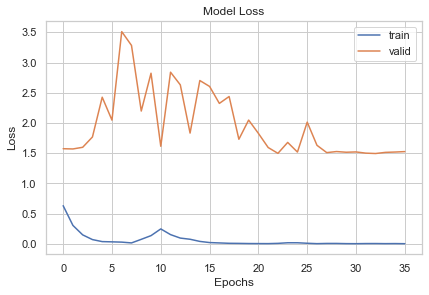

In [112]:
plt.plot(History.history['loss'])
plt.plot(History.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epochs')
plt.legend(['train', 'valid'])
plt.show()

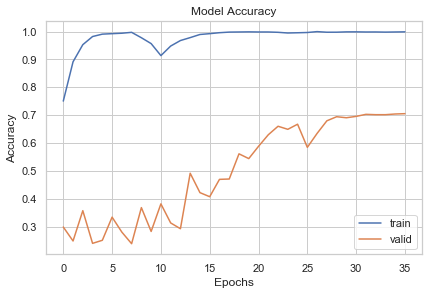

In [113]:
plt.plot(History.history['accuracy'])
plt.plot(History.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epochs')
plt.legend(['train', 'valid'])
plt.show()

In [114]:
# getting predictions on val set.
pred=model.predict(x_test)
pred_digits=np.argmax(pred,axis=1)

In [115]:
def make_train_data1(flower_type,DIR):
    for img in os.listdir(DIR):
        label=assign_label(img,flower_type)
        path = os.path.join(DIR,img)
        img = cv2.imread(path,cv2.IMREAD_COLOR)
        img = cv2.resize(img, (IMG_SIZE,IMG_SIZE))
            
        t.append(np.array(img))
        s.append(str(label))

In [116]:
t=[]
s=[]
DIR1='/Users/user/Desktop/test/dandilion'
DIR2='/Users/user/Desktop/test/daisy'
DIR5='/Users/user/Desktop/test/tulip'
DIR4='/Users/user/Desktop/test/sunflower'
DIR3='/Users/user/Desktop/test/rose'
make_train_data1('dandilion',DIR1)
make_train_data1('daisy',DIR2)
make_train_data1('rose',DIR3)
make_train_data1('sunflower',DIR4)
make_train_data1('tulip',DIR5)

In [117]:
le=LabelEncoder()
u=le.fit_transform(s)
u=to_categorical(u,5)
t=np.array(t)
t=t/255
print(t.shape)

(5, 80, 80, 3)


In [118]:
# getting predictions on val set.
pred=model.predict(t)
pred_digits=np.argmax(pred,axis=1)
print(pred_digits)
print(pred)

[0 0 1 2 1]
[[9.3582070e-01 6.4144321e-02 2.1590141e-08 3.4970828e-05 2.4812728e-12]
 [1.0000000e+00 1.0008569e-11 3.4707061e-15 3.4219547e-10 2.7789844e-18]
 [9.1852986e-10 9.9928111e-01 5.9802865e-09 7.1896717e-04 2.0881639e-13]
 [5.8103755e-08 1.9614524e-11 1.0000000e+00 4.6922715e-09 3.1073325e-18]
 [1.6994284e-04 9.9941707e-01 1.7630261e-07 4.1291802e-04 4.0497442e-11]]


In [119]:
prop_class=[]
mis_class=[]

for i in range(5):
    if(cheak1[i]==pred_digits[i]):
        prop_class.append(i)

i=0
for i in range(5):
    if( cheak1[i]!=pred_digits[i]):
        mis_class.append(i)

IndexError: index 4 is out of bounds for axis 0 with size 4

In [120]:
print(len(prop_class))
print(len(mis_class))

3
0


(5,)


IndexError: list index out of range

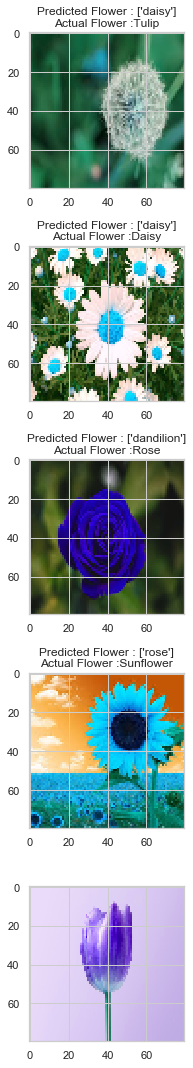

In [121]:
warnings.filterwarnings('always')
warnings.filterwarnings('ignore')

count=0
fig,ax=plt.subplots(5,1)
print(ax.shape)
fig.set_size_inches(15,15)
for j in range (5):
        ax[j].imshow(t[count])
        ax[j].set_title("Predicted Flower : "+str(le.inverse_transform([pred_digits[count]]))+"\n"+"Actual Flower :"+l[count] )
        plt.tight_layout()
        count+=1